# Анализ метода Монте-Карло
## Вычисление площади пересечения трех окружностей

---
**Посылка в CodeForces**: 349265650

**Ссылка на репозиторий**: https://github.com/Alimhux/DCA-Homeworks

---

Загрузим необходимые библиотеки для работы с табличными данными

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✓ Библиотеки загружены")

✓ Библиотеки загружены


Загрузим полученные в ходе тестирования данные, и вычислим площадь фигуры из условия.

In [23]:
# Точное значение площади
exact_area = 0.25 * np.pi + 1.25 * np.arcsin(0.8) - 1.0

# Загрузка данных
wide_data = pd.read_csv('monte_carlo_wide.csv')
narrow_data = pd.read_csv('monte_carlo_narrow.csv')

# Группировка и статистика
wide_stats = wide_data.groupby('N').agg({
    'Area': ['mean', 'std'],
    'RelativeError': ['mean', 'std']
}).reset_index()
wide_stats.columns = ['N', 'Area_Mean', 'Area_Std', 'Error_Mean', 'Error_Std']

narrow_stats = narrow_data.groupby('N').agg({
    'Area': ['mean', 'std'],
    'RelativeError': ['mean', 'std']
}).reset_index()
narrow_stats.columns = ['N', 'Area_Mean', 'Area_Std', 'Error_Mean', 'Error_Std']

print(f"Точное значение площади: {exact_area:.6f}")
print(f"Загружено данных: {len(wide_data)} записей")

Точное значение площади: 0.944517
Загружено данных: 2000 записей


---
## 1. Приближенное значение площади

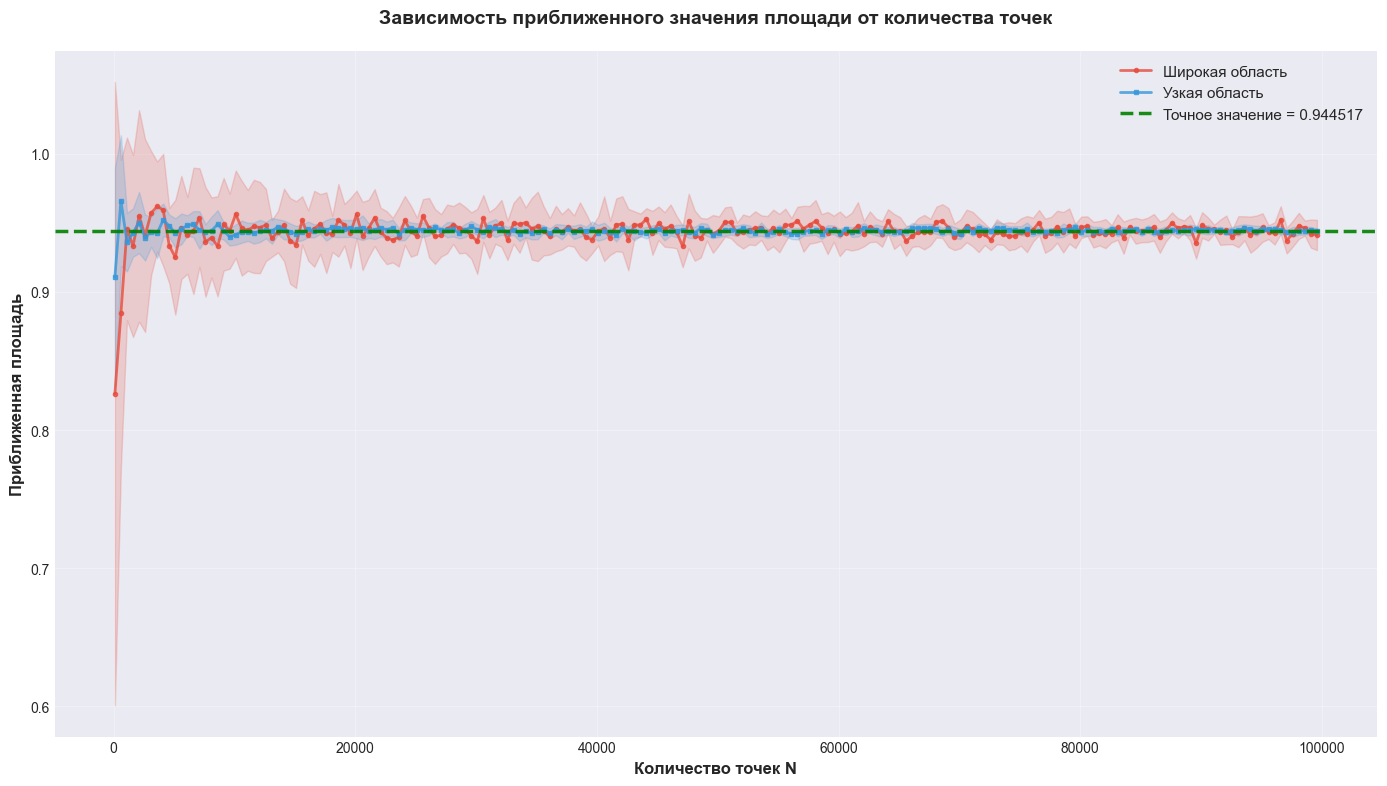

✓ График сохранён: graph_1_area_approximation.png


In [24]:
plt.figure(figsize=(14, 8))

plt.plot(wide_stats['N'], wide_stats['Area_Mean'], 
         label='Широкая область', marker='o', markersize=3, 
         linewidth=2, alpha=0.8, color='#E74C3C')
plt.fill_between(wide_stats['N'], 
                 wide_stats['Area_Mean'] - wide_stats['Area_Std'],
                 wide_stats['Area_Mean'] + wide_stats['Area_Std'],
                 alpha=0.2, color='#E74C3C')

plt.plot(narrow_stats['N'], narrow_stats['Area_Mean'], 
         label='Узкая область', marker='s', markersize=3, 
         linewidth=2, alpha=0.8, color='#3498DB')
plt.fill_between(narrow_stats['N'], 
                 narrow_stats['Area_Mean'] - narrow_stats['Area_Std'],
                 narrow_stats['Area_Mean'] + narrow_stats['Area_Std'],
                 alpha=0.2, color='#3498DB')

plt.axhline(y=exact_area, color='green', linestyle='--', 
            linewidth=2.5, label=f'Точное значение = {exact_area:.6f}', alpha=0.9)

plt.xlabel('Количество точек N', fontsize=12, fontweight='bold')
plt.ylabel('Приближенная площадь', fontsize=12, fontweight='bold')
plt.title('Зависимость приближенного значения площади от количества точек', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('graph_1_area_approximation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_1_area_approximation.png")

На графике видно, как приближенное значение площади сходится к точному значению при увеличении N. При малых N (до 5000-10000) наблюдаются сильные колебания результатов - это видно по широким затененным областям, показывающим стандартное отклонение. С ростом N обе кривые стабилизируются и приближаются к зеленой пунктирной линии (точное значение). Узкая область (синяя) показывает меньший разброс результатов и быстрее стабилизируется, чем широкая область (красная). Уже при N около 20000-30000 обе области дают достаточно стабильные оценки, близкие к истинному значению.


---
## 2. Относительная погрешность

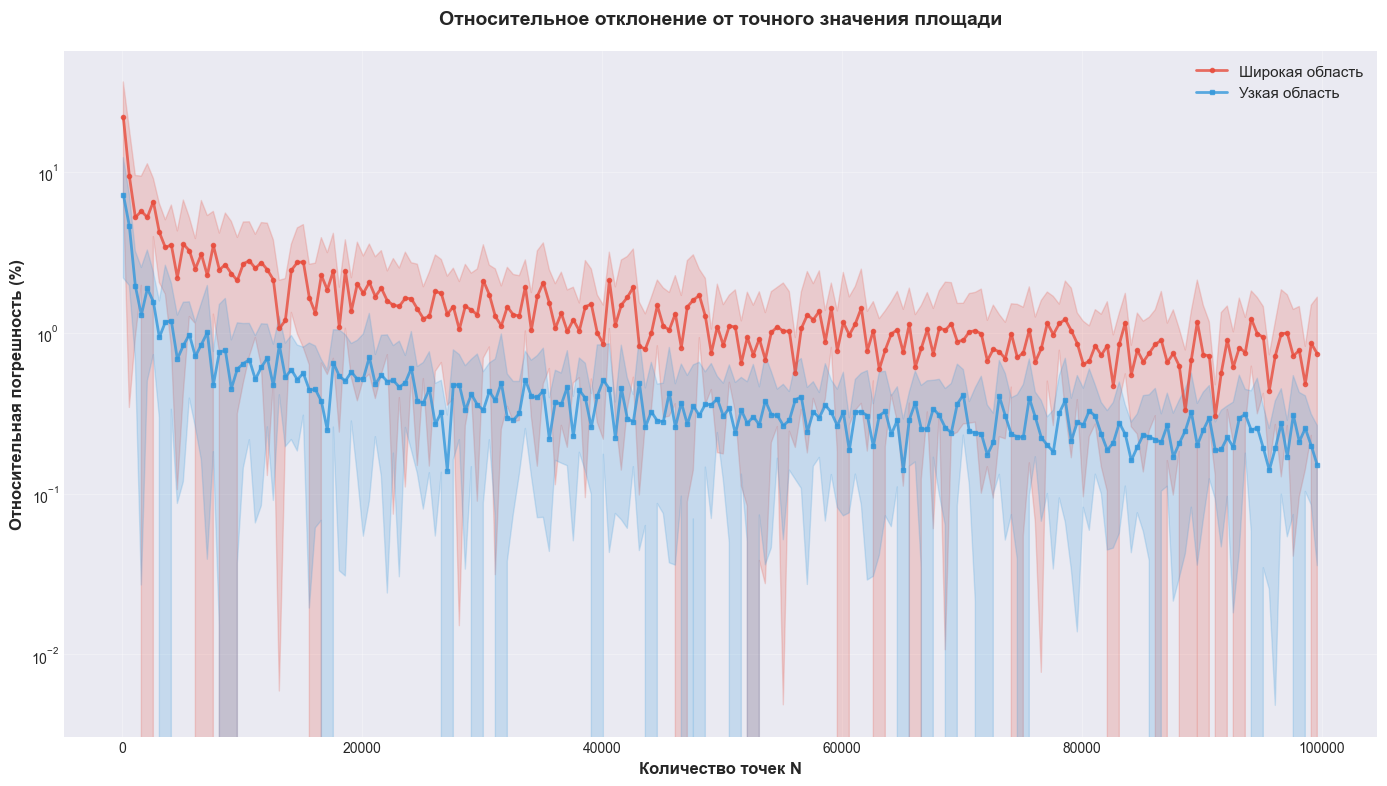

✓ График сохранён: graph_2_relative_error.png


In [25]:
plt.figure(figsize=(14, 8))

plt.plot(wide_stats['N'], wide_stats['Error_Mean'] * 100, 
         label='Широкая область', marker='o', markersize=3, 
         linewidth=2, alpha=0.8, color='#E74C3C')
plt.fill_between(wide_stats['N'], 
                 (wide_stats['Error_Mean'] - wide_stats['Error_Std']) * 100,
                 (wide_stats['Error_Mean'] + wide_stats['Error_Std']) * 100,
                 alpha=0.2, color='#E74C3C')

plt.plot(narrow_stats['N'], narrow_stats['Error_Mean'] * 100, 
         label='Узкая область', marker='s', markersize=3, 
         linewidth=2, alpha=0.8, color='#3498DB')
plt.fill_between(narrow_stats['N'], 
                 (narrow_stats['Error_Mean'] - narrow_stats['Error_Std']) * 100,
                 (narrow_stats['Error_Mean'] + narrow_stats['Error_Std']) * 100,
                 alpha=0.2, color='#3498DB')

plt.xlabel('Количество точек N', fontsize=12, fontweight='bold')
plt.ylabel('Относительная погрешность (%)', fontsize=12, fontweight='bold')
plt.title('Относительное отклонение от точного значения площади', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('graph_2_relative_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_2_relative_error.png")

На графике видно, как относительная погрешность уменьшается с ростом N. Чётко видно, что узкая область (синяя линия) систематически даёт меньшую погрешность на всех диапазонах N. При N = 100 погрешность может достигать 10-20%, но уже при N = 10000 она снижается до 1-2% для узкой области и 2-3% для широкой.

---
## Выводы

### Влияние количества точек N

С увеличением количества точек N приближенное значение площади сходится к точному значению для обеих областей. При малых N (100-1000) наблюдается большой разброс результатов и высокая погрешность. Начиная с N ≈ 5000-10000 погрешность заметно снижается и стабилизируется.

Относительная погрешность убывает примерно как 1/√N, что соответствует теоретическим ожиданиям для метода Монте-Карло. При N = 100000 обе области дают погрешность менее 1%.

### Сравнение широкой и узкой областей

Узкая область показывает более точные результаты:
- Меньшая погрешность на всех диапазонах N
- Более быстрая сходимость к точному значению
- Меньший разброс результатов

Это довольно логично, поскольку в узкой области большая доля генерируемых точек будет попадать в целевую фигуру. 

Можем заметить, что широкая область требует большего N для достижения той же точности, что и узкая область, так как много точек генерируется вне целевой фигуры.

Для получения приемлемой точности (погрешность менее чем 2-3%) рекомендуется использовать N ≥ 15000 для узкой области или N ≥ 30000 для широкой. Если требуется высокая точность (< 1%), следует использовать N ≥ 50000.

Можно сделать вывод, что по возможности стоит использовать узкую область, плотно ограничивающую целевую фигуру, так как это дает лучшую точность при том же количестве точек, то есть, одинаковых временных затратах.